In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('Salary_data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [43]:
df1 = df[['Salary', 'Years of Experience']]
df1

,Salary,Years of Experience
0,90000.0,5.0
1,65000.0,3.0
2,150000.0,15.0
3,60000.0,7.0
4,200000.0,20.0
...,...,...
370,85000.0,8.0
371,170000.0,19.0
372,40000.0,2.0
373,90000.0,7.0


In [44]:
df1.isna().sum()

Salary                 2
Years of Experience    2
dtype: int64

In [45]:
df1 = df1.dropna()
df1.isna().sum()

Salary                 0
Years of Experience    0
dtype: int64

In [ ]:
# data = df1['production_companies'][0]
# data
# df2 = pd.read_json(data)
# company_df = pd.DataFrame({'company':[list(df2['name'])]})
# company_df

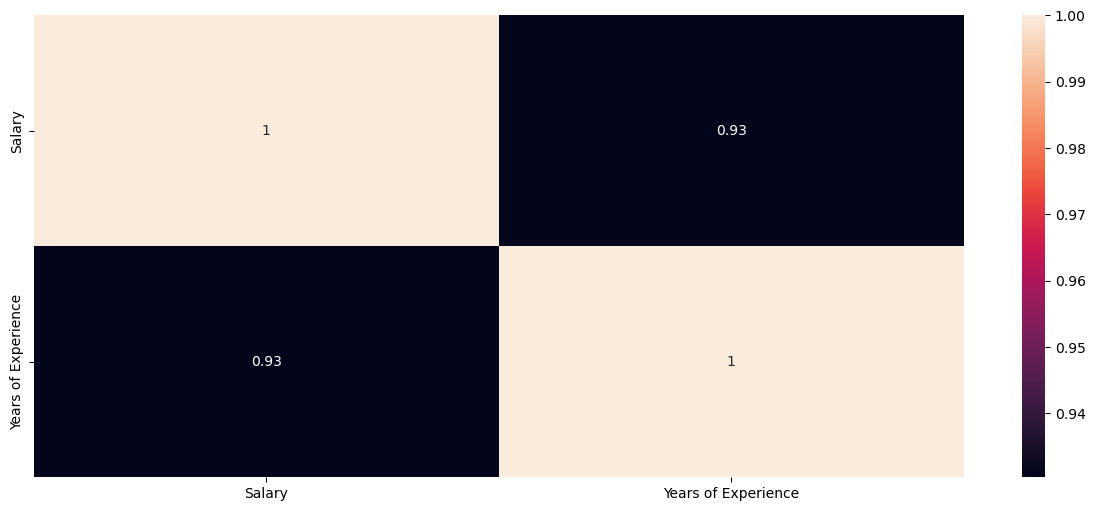

In [46]:
plt.figure(figsize = (15, 6))
sns.heatmap(df1.corr(), annot = True)
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
df2_train, df2_test = train_test_split(df1, test_size = 0.1, random_state = 1)

In [63]:
from sklearn.linear_model import LinearRegression
X_train = df2_train[['Years of Experience']]
Y_train = df2_train[['Salary']]
lm = LinearRegression()
model = lm.fit(X_train, Y_train)
               

In [64]:
data = df2_test.iloc[53:54]

actual_salary = data.pop('Salary')

print(f'actual salary = {actual_salary}')
data


actual salary = Series([], Name: Salary, dtype: float64)


,Years of Experience


In [62]:
import numpy as np
predicted_all = model.predict(data)
np.set_printoptions(suppress=True)
print(predicted_all[0])
# print('actual sa =', actual_salary)
# print('Predicted salary =', predicted_salary)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.